<a href="https://colab.research.google.com/github/EiffL/Lucide/blob/master/Lucide_3x2pt_requirements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How precise do my 2pt functions need to be to fit Lucide requirements

This notebook tries to answer the question of what might be the margin for error in computing the 2pt function, and I mean, just the computation of the 2pt function, if we want to fit within the error budget for Lucide LE3.

We're going to use the public and open source [jax-cosmo](https://github.com/DifferentiableUniverseInitiative/jax_cosmo) package to answer that question.





In [1]:
!pip install git+https://github.com/DifferentiableUniverseInitiative/jax_cosmo.git

  Cloning https://github.com/DifferentiableUniverseInitiative/jax_cosmo.git to /tmp/pip-req-build-ws7f4x9f
  Running command git clone -q https://github.com/DifferentiableUniverseInitiative/jax_cosmo.git /tmp/pip-req-build-ws7f4x9f
  Created wheel for jax-cosmo: filename=jax_cosmo-0.1rc5-cp36-none-any.whl size=31373 sha256=d443d34ad2e2a451144ada4651aee304575d665fc94e84f1010c78596ea39a92
  Stored in directory: /tmp/pip-ephem-wheel-cache-dzedx35t/wheels/88/09/bb/e8fa873bc98f4b1be20b586d836ec856fa676f1c8b1142ef06
Successfully built jax-cosmo


In [2]:
%pylab inline
import jax_cosmo as jc
import jax.numpy as np
import jax

Populating the interactive namespace from numpy and matplotlib


## Step I: define the probes

We are working in the context of the Lucide survey, which makes the following assumptions (which I guess happen to be similar to [arxiv:2005.00055](https://arxiv.org/pdf/2005.00055.pdf))

### Redshift distributions



In [ ]:
# Step a: degi
nz = jc.redshift.smail_nz(2.0, 3./2., 0.9/np.sqrt(2), gals_per_arcmin2=30.)

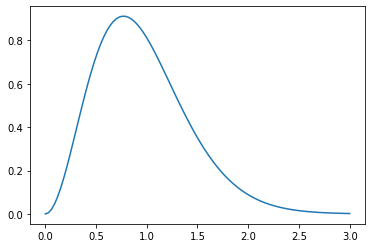

In [ ]:
z = np.linspace(0,3,100);
plot(z, nz(z))

### Bias parameters

TODO: Add bin-dependent bias parameters

In [ ]:
bias = [jc.bias.constant_linear_bias(1.10)]

### IA parameterisation

TODO: Add lumonisity and redshift scaling of IA bias

In [ ]:
ia_bias = [jc.bias.constant_linear_bias(1.0)]

### Form the 2pt probes

In [ ]:
probes = [jc.probes.WeakLensing([nz], ia_bias=ia_bias),
          jc.probes.NumberCounts([nz], bias)]

## Step  II: Building the likelihood

Now that we have defined some probes, we can build the likelihood function

In [ ]:
ell = np.logspace(1, np.log10(1500))

def mu(params):
  mu, cov = jc.angular_cl.gaussian_cl_covariance_and_mean(params, ell)

  